mpg 데이터는 1988년 ,2004년, 2008년도에 미국에서 생산된 자동차 관련 정보

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn에서 제공하는 그래프테마
# sns.set_style("ticks")
# sns.set_style("darkgrid")
sns.set_style("whitegrid")

# 그래프를 그리기 위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'

# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'Apple Gothic'

# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6

# 글자 크기
plt.rcParams['font.size'] = 14

# 폰트 설정 시 '-'기호 깨는거 방지하기
plt.rcParams['axes.unicode_minus'] = False

### 데이터 가져오기

In [2]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### 데이터 살펴보기
- manufacture : 제조사
- model : 자동차 모델명
- displ : 배기량
- year : 생산년도
- cyl : 실린더 개수
- trans : 변속기 종류
- drv : 구동방식
- cty : 시내연비
- hwy : 고속도로연비
- fl : 연료종류(c : 가스, d : 디젤, e : 에탄올 혼합연로, p : 고급휘발유, r : 보통휘발유)
- class : 자동차 종류

In [3]:
# 데이터 프레임의 크기를 확인한다.
a1, a2 = mpg_df.shape
print(f'행의 크기: {a1}')
print(f'열의 크기 : {a2}')

행의 크기: 234
열의 크기 : 12


In [4]:
# 데이터 프레임 개요 정보. 여기서 유심히 봐야할 것은 Dtype이다.
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


### 문제1 : 자동차 배기량에 따라 고속도로 연비가 다른지 알아본다.
- displ(배기량)이 4이하인 자동차와 5이상인 자동차 중 어떤 자동차의 hwy(고속도로 연비)가 평균적으로 더 높은지 알아보세요.

못 품 ㅜㅜ. 놓친부분
- `query`
- 딕셔너리로 df 만드는 법 ...

In [5]:
mpg_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [6]:
# 배기량이 4 이하인 자동차들의 고속도로 연비 평균
mpg_a = mpg_df.query('displ <=4')
a1 = mpg_a['hwy'].mean()
a1

25.96319018404908

In [7]:
# 배기량이 4 초과인 자동차들의 고속도로 연비 평균
mpg_b = mpg_df.query('displ >4')
a2 = mpg_b['hwy'].mean()
a2

17.64788732394366

배기량이 높으면 연비가 떨어진다는 것을 알 수 있다.

,배기량 4이하,배기량 4초과
고속도로 연비 평균,25.96319,17.647887


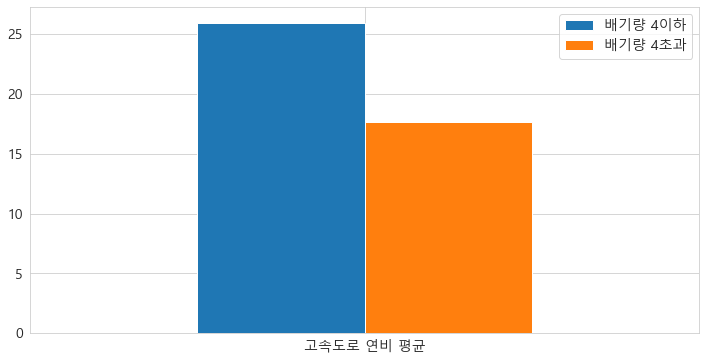

In [8]:
# 데이터 프레임 생성
d1 = {
    '배기량 4이하' : [a1],
    '배기량 4초과' : [a2],
}
tmp_df = pd.DataFrame(d1)
tmp_df.index = ['고속도로 연비 평균']
display(tmp_df)

tmp_df.plot.bar(rot=0)
plt.show()

x축이 인덱스이기 때문에 고속도로 연비 평균이란 하나의 인덱스에 두 컬럼이 동시에 표현되면서 그래프가 붙어서 표현되었다.

,고속도로 평균연비
배기량 4이하,25.963190
배기량 4초과,17.647887


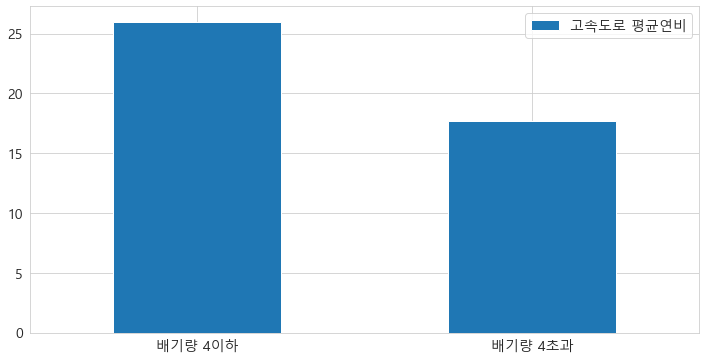

In [9]:
d1 = {
    '고속도로 평균연비' : [a1, a2]
}
temp_df = pd.DataFrame(d1)
temp_df.index = ['배기량 4이하', '배기량 4초과']
display(temp_df)

temp_df.plot.bar(rot=0)
plt.show()

잘 표현되었으나, 범례가 아쉽다.

,배기량,고속도로 평균연비
0,4이하,25.963190
1,4초과,17.647887


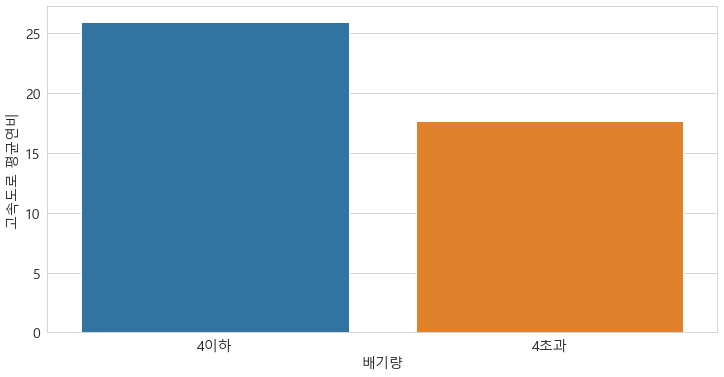

In [11]:
d1 = {
    '배기량' : ['4이하', '4초과'],
    '고속도로 평균연비' : [a1, a2]
}

temp_df = pd.DataFrame(d1)
display(temp_df)

sns.barplot(x='배기량', y='고속도로 평균연비', data=temp_df)
plt.show()

### 문제2: 자동차 제조회사(manufacture)에 따라 시내 연비(cty)가 다른지 알아본다.

In [12]:
# 자동차 회사와 도시 연비를 가져온다.
df_tmp = mpg_df[['manufacturer', 'cty']]
df_tmp

,manufacturer,cty
0,audi,18
1,audi,21
2,audi,20
3,audi,21
4,audi,16
...,...,...
229,volkswagen,19
230,volkswagen,21
231,volkswagen,16
232,volkswagen,18


In [13]:
# 제조사별 도시 연비 평균을 구한다.
df_result = df_tmp.groupby('manufacturer').mean()
df_result

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


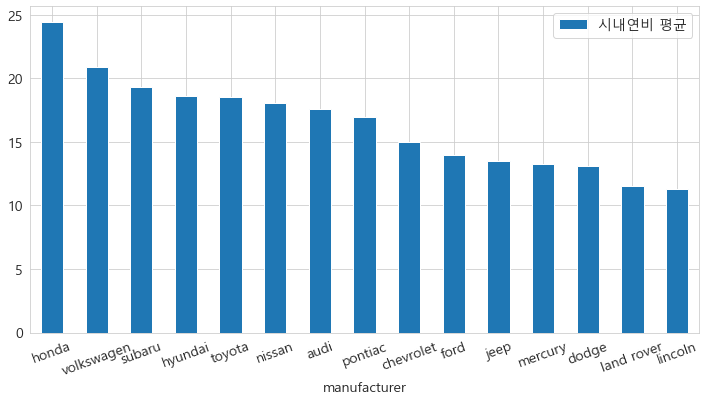

In [14]:
# 도시 연비를 기준으로 정렬.
df_result.sort_values('cty', ascending=False, inplace=True)
df_result.columns = ['시내연비 평균']
df_result.plot.bar(rot=20)
plt.show()

In [15]:
# 데이터 프레임의 인덱스를 리셋한다. (이 때 drop=True를 하지 않으면 인덱스가 컬럼으로 포함된다.)
df_result.reset_index(inplace=True)
df_result.columns = ['제조사', '도시 연비 평균']
df_result

,제조사,도시 연비 평균
0,honda,24.444444
1,volkswagen,20.925926
2,subaru,19.285714
3,hyundai,18.642857
4,toyota,18.529412
5,nissan,18.076923
6,audi,17.611111
7,pontiac,17.000000
8,chevrolet,15.000000
9,ford,14.000000


<AxesSubplot:xlabel='제조사', ylabel='도시 연비 평균'>

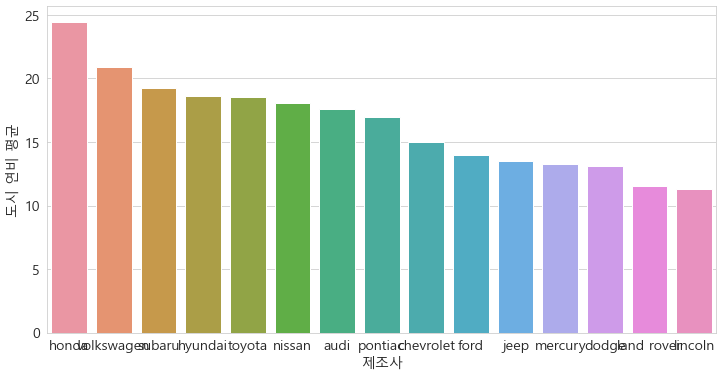

In [16]:
sns.barplot(x='제조사', y='도시 연비 평균', data=df_result)